Q-3. Consider the ‘Blood Pressure Before’ and ‘Blood Pressure After’ columns from the data and calculate the following

* a. Measure the dispersion in both and interpret the results.
* b. Calculate mean and 5% confidence interval and plot it in a graph
* c. Calculate the Mean absolute deviation and Standard deviation and interpret the results.
* d. Calculate the correlation coefficient and check the significance of it at 1% level of significance.

Dataset link - https://drive.google.com/file/d/1mCjtYHiX--mMUjicuaP2gH3k-SnFxt8Y/view?usp=share_

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Read the data from CSV file
df = pd.read_csv('dataset/Blood_Pressure.csv')
df.head()

,Patient ID,Blood Pressure Before (mmHg),Blood Pressure After (mmHg)
0,1,130,120
1,2,142,135
2,3,120,118
3,4,135,127
4,5,148,140


In [3]:
df.columns

Index(['Patient ID', ' Blood Pressure Before (mmHg)',
       ' Blood Pressure After (mmHg)'],
      dtype='object')

In [4]:
# Extract the 'Blood Pressure Before' and 'Blood Pressure After' columns
bp_before = df[' Blood Pressure Before (mmHg)']
bp_after = df[' Blood Pressure After (mmHg)']

In [6]:
# a. Measure the dispersion in both and interpret the results.

dispersion_before = np.std(bp_before)
dispersion_after = np.std(bp_after)

print("Dispersion (Std) of Blood Pressure Before:", dispersion_before)
print("Dispersion (Std) of Blood Pressure After:", dispersion_after)

Dispersion (Std) of Blood Pressure Before: 6.5652037287505385
Dispersion (Std) of Blood Pressure After: 6.853495458523338


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


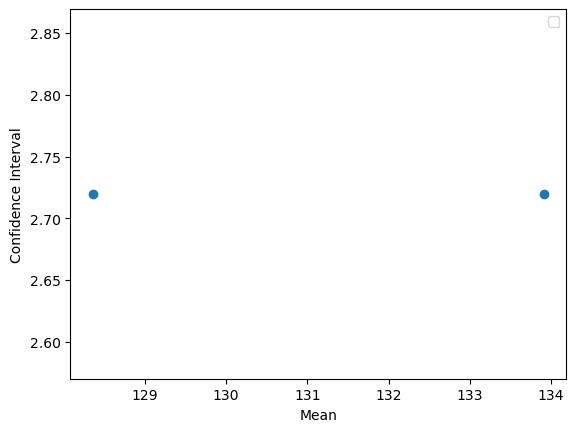

In [86]:
# b. Calculating mean and 5% confidence interval and plot it in a graph
from scipy.stats import t

m_before = np.mean(bp_before)
m_after = np.mean(bp_after)
std_before = np.std(bp_before)
std_before = np.std(bp_after)
confidence = 0.95
n= len(bp_before)
dof = n-1 

t_crit = np.abs(t.ppf((1-confidence)/2,dof))
l_fence_before = ((m_before)-(std_before*t_crit))/(np.sqrt(n))
u_fence_before = ((m_before)+(std_before*t_crit))/(np.sqrt(n))
l_fence_after = ((m_after)-(std_after*t_crit))/(np.sqrt(n))
u_fence_after = ((m_after)+(std_after*t_crit))/(np.sqrt(n))


confidence_interval_before = u_fence_before - l_fence_before
confidence_interval_after = u_fence_after - l_fence_after

m = [m_before,m_after]
ci = [confidence_interval_before,confidence_interval_after]

# Plotting
plt.scatter(x = m , y = ci)
plt.xlabel("Mean")
plt.ylabel('Confidence Interval')
plt.legend()
plt.show()

In [10]:
# c. Calculate the Mean absolute deviation and Standard deviation and interpret the results

mad_before = np.mean(np.abs(bp_before - np.mean(bp_before)))
mad_after = np.mean(np.abs(bp_after - np.mean(bp_after)))

std_before = np.std(bp_before)
std_after = np.std(bp_after)

print("Mean Absolute Deviation (MAD) of Blood Pressure Before:", mad_before)
print("Mean Absolute Deviation (MAD) of Blood Pressure After:", mad_after)
print("Standard Deviation (Std) of Blood Pressure Before:", std_before)
print("Standard Deviation (Std) of Blood Pressure After:", std_after)

Mean Absolute Deviation (MAD) of Blood Pressure Before: 5.7118
Mean Absolute Deviation (MAD) of Blood Pressure After: 5.9
Standard Deviation (Std) of Blood Pressure Before: 6.5652037287505385
Standard Deviation (Std) of Blood Pressure After: 6.853495458523338


In [12]:
# d. Calculate the correlation coefficient and check the significance of it at 1% level of significance.
from scipy import stats
correlation_coef = np.corrcoef(bp_before, bp_after)[0, 1]
n = len(bp_before)
degrees_of_freedom = n - 2

# Calculate t-value for a one-tailed test at 1% level of significance
t_critical = np.abs(np.round(stats.t.ppf(0.01, df=degrees_of_freedom), 2))

# Calculate the standard error of correlation coefficient
se_correlation = np.sqrt((1 - correlation_coef ** 2) / degrees_of_freedom)

# Calculate the t-value for correlation coefficient
t_value = correlation_coef / se_correlation

# Check if the correlation coefficient is significant at 1% level of significance
if np.abs(t_value) > t_critical:
    print("The correlation coefficient is significant at the 1% level of significance.")
else:
    print("The correlation coefficient is not significant at the 1% level of significance.")


The correlation coefficient is significant at the 1% level of significance.
